In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
groq_model=os.getenv("GROQ_MODEL_NAME")

In [4]:
from langchain_openai import ChatOpenAI

llm=ChatOpenAI(model="gpt-4o")

c:\Users\hites\OneDrive\Desktop\AI\agentic-rag\langgraph\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model=groq_model)

In [6]:
from langgraph.checkpoint.memory import MemorySaver

memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

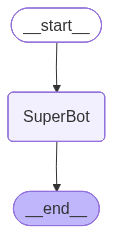

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)

graph_builder=graph.compile(checkpointer=memory)

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Hitesh And I like dance"},config)

{'messages': [HumanMessage(content='Hi,My name is Hitesh And I like dance', additional_kwargs={}, response_metadata={}, id='c4189a4e-d57f-47de-8b71-fc184c1e3338'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Hitesh and mentioned he likes dancing. I need to respond in a friendly and encouraging way. Let me start by greeting him back and acknowledging his interest in dance.\n\nI should ask him more about what kind of dance he enjoys. Maybe he's into a specific style like hip-hop, ballet, or contemporary. It's good to know so I can engage in a more meaningful conversation. Also, I can ask if he's been dancing for a while or just starting out. That way, I can offer relevant advice or encouragement.\n\nI should make sure my tone is positive and supportive. Maybe add an emoji to keep it light and friendly. Let me check if there are any other aspects I should cover. Perhaps ask why he likes dancing—expressing himself, staying active, or maybe it's a social activity for 

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as Krish and mentioned he likes cricket. I need to respond in a friendly and engaging way. Since he's from India, I can relate to cricket's popularity there. I should acknowledge his introduction, express interest in cricket, ask about his favorite teams or players, and maybe suggest a topic for further discussion. Keep the tone positive and open-ended to encourage conversation. Make sure to use his name to make it personal. Also, check if there's a follow-up question or if there's anything else he wants to talk about.\n</think>\n\nHi Krish! 🏏 Nice to meet you! I know cricket is super popular in India, and it's an incredible sport to watch and play. Do you have a favorite team or player? I’d love to hear more about what you enjoy most about the game! Also, feel free to ask me anything about cricket or anything else you’re curious about. 😊", additional_kwargs={}, response_metadata={'token_usage': {'

In [10]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='39bcef4e-7717-47ce-a25e-436d0228c65f'), AIMessage(content="<think>\nOkay, the user introduced himself as Krish and mentioned he likes cricket. I need to respond in a friendly and engaging way. Since he's from India, I can relate to cricket's popularity there. I should acknowledge his introduction, express interest in cricket, ask about his favorite teams or players, and maybe suggest a topic for further discussion. Keep the tone positive and open-ended to encourage conversation. Make sure to use his name to make it personal. Also, check if there's a follow-up question or if there's anything else he wants to talk about.\n</think>\n\nHi Krish! 🏏 Nice to meet you! I know cricket is super popular in India, and it's an incredible sport to watch and play. Do you have a favorite team or player? I’d love to hear more about what you enjoy most about the game! Also, feel f

In [11]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='<think>\nOkay, let me see. The user is Krish, and he\'s mentioned liking both cricket and football. He just said "I also like football" again. Maybe he wanted to emphasize it or correct himself. I should acknowledge his interest in both sports.\n\nIn the previous messages, the assistant acknowledged Krish\'s interest in cricket and then football, asking about favorite teams or players. Now, Krish is reiterating his love for football. Since the assistant already asked about favorite teams, maybe Krish is looking for a deeper conversation or wants to share more. \n\nI need to respond in a friendly way, maybe ask for more details about his preferences in football. Perhaps he has a favorite team or player now. The assistant should encourage him to elaborate, maybe ask about what he enjoys most about football. Also, since he likes both sports, maybe there\'s a comparison he\'d like to make or discuss the differences in his enjoyment between the 

In [12]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='39bcef4e-7717-47ce-a25e-436d0228c65f'), AIMessage(content="<think>\nOkay, the user introduced himself as Krish and mentioned he likes cricket. I need to respond in a friendly and engaging way. Since he's from India, I can relate to cricket's popularity there. I should acknowledge his introduction, express interest in cricket, ask about his favorite teams or players, and maybe suggest a topic for further discussion. Keep the tone positive and open-ended to encourage conversation. Make sure to use his name to make it personal. Also, check if there's a follow-up question or if there's anything else he wants to talk about.\n</think>\n\nHi Krish! 🏏 Nice to meet you! I know cricket is super popular in India, and it's an incredible sport to watch and play. Do you have a favorite team or player? I’d love to hear more about what you enjoy most about the game! Also, feel f

In [13]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'ca76033b-aafc-40bd-9d40-e73b82f42c24', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='39bcef4e-7717-47ce-a25e-436d0228c65f'), AIMessage(content="<think>\nOkay, the user introduced himself as Krish and mentioned he likes cricket. I need to respond in a friendly and engaging way. Since he's from India, I can relate to cricket's popularity there. I should acknowledge his introduction, express interest in cricket, ask about his favorite teams or players, and maybe suggest a topic for further discussion. Keep the tone positive and open-ended to encourage conversation. Make sure to use his name to make it personal. Also, check if there's a follow-up question or if th